# Movie Data Analysis

## Overview

Our project involves the examination of film data sourced from the Internet Movie Database (IMDb), the Numbers database (TN), and The Movie Database (TMDB). By analyzing a film's worldwide gross, budgets, genres, ratings, and directors, we hope to gain insights that will guide decision-making within the film industry. Our aim is to evaluate trends in these specific categories associated with film success. Through this comprehensive analysis, we will be able to make recommendations leading to a successful production.

## Business Problem

Now that we've successfully taken over the aviation industry, it's time to expand our company, newly renamed to AirFlix Studios, to the next frontier: film. This will allow our company to grow while also providing our passengers with top of the line entertainment during their flights. 

To facilitate this transition, we focused on three ways AirFlix can start out ahead in this industry. First, we want to focus on Worldwide success. We want to utilize the world's boundless market and focus on films that can be enjoyed not just in the States, but abroad as well. Second, we want to create blockbuster films. We want movies that draw wide-ranging audiences with all different tastes and preferences. And finally, we want to build brand recognition. We want the public to associate our name with high-quality films. We want people lining up at the theatre just because they saw our name in the trailer.

In order to accomplish all three of those, our data analysis led to the following recommendations:
1. Worldwide Success ----> Big Budgets
2. Blockbuster Films ----> Adventurous, Musical Animations
3. Brand Recognition ----> High-Quality Directors

Continue below to see how we arrived at these recommendations.

## Data Understanding

HERE
The datasets used in this analysis come from the Internet Movie Database (IMDb), the Numbers database (TN), and The Movie Database (TMDB).

For Genre and Director, we used the IMDb data and honed in on blockbuster films by removing movies with less than 10,000 votes for their rating. The reason for this was that we saw films under this threshold as not having substantial Worldwide Gross numbers. 

Furthermore, we focused on experienced Directors that have worked on more than 2 films. We then created a director rating by averaging the IMDb's movie ratings for every movie that director worked on.

Budget: 
movies_and_budgets_df 2k 1946 to 2019

Genres: 
movies_budgets_genres 6k from 1976 to 2019

Directors:


In [1]:
#Imports
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import pickle
import os
from statsmodels.formula.api import ols

### IMDB

In [2]:
im_db = 'data/im.db'

im_db_conn = sqlite3.connect(im_db)

q = """

SELECT *
FROM sqlite_master


;
"""

pd.read_sql(q, im_db_conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Michael to add what he noticed here, if anything.

In [3]:
q = """

SELECT *
FROM movie_basics

;
"""

pd.read_sql(q, im_db_conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Michael to add what he noticed here, if anything.

In [4]:
q = """

SELECT *
FROM movie_ratings

;
"""

pd.read_sql(q, im_db_conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Michael to add what he noticed here, if anything.

In [5]:
q = """

SELECT *
FROM persons

;
"""

pd.read_sql(q, im_db_conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


Michael to add what he noticed here, if anything.

In [6]:
q = """

SELECT *
FROM directors

;
"""

pd.read_sql(q, im_db_conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


Michael to add what he noticed here, if anything.

In [7]:
q = """

SELECT *
FROM writers

;
"""

pd.read_sql(q, im_db_conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


Michael to add what he noticed here, if anything.

### TMDB Movies

In [12]:
movies_df = pd.read_csv("data/tmdb.movies.csv")
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


From the movies_df we noticed that the release_date would need to be converted to date time so that we could run an analysis on that column.

### TN Movie Budgets

In [14]:
budgets_df = pd.read_csv("data/tn.movie_budgets.csv")
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the budgets_df we noticed that the release_date would need to be converted to date time and the production_budget, domestic_gross, and worldwide_gross would need to be converted to numerics so that we could run an analysis on those columns.

## Data Preparation

To focus on Genre and Director, we used the IMDb data and honed in on those blockbuster films that were very wide-spread by removing movies with less than 10,000 votes for their rating.

In [16]:
q = """

SELECT DISTINCT *
FROM movie_basics
LEFT JOIN directors
    USING(movie_id)
LEFT JOIN movie_ratings
    USING(movie_id)
LEFT JOIN persons
    USING(person_id)
WHERE numvotes > 9999 and averagerating != 'NaN'
;
"""

cleaned_movies_df = pd.read_sql(q, im_db_conn)

In [17]:
series = cleaned_movies_df.groupby('primary_name')['averagerating'].mean()

In [18]:
director_ratings_df = pd.DataFrame(series)

In [19]:
director_ratings_df = director_ratings_df.rename(columns={'averagerating':'director_rating'})

In [20]:
director_ratings_df = director_ratings_df.reset_index()
director_ratings_df.head()

,primary_name,director_rating
0,A.R. Murugadoss,7.600
1,Aanand L. Rai,6.925
2,Aaron Hann,6.000
3,Aaron Harvey,4.600
4,Aaron Horvath,6.800


In [21]:
cleaned_movies_ratings_df = cleaned_movies_df.merge(director_ratings_df, how='left', on='primary_name')

In [22]:
cleaned_movies_ratings_df.loc[cleaned_movies_ratings_df['primary_name'] == 'Christopher Nolan']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession,director_rating
413,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",nm0634240,8.4,1387769,Christopher Nolan,1970.0,NaN,"writer,producer,director",8.425
1063,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",nm0634240,8.6,1299334,Christopher Nolan,1970.0,NaN,"writer,producer,director",8.425
2024,tt5013056,Dunkirk,Dunkirk,2017,106.0,"Action,Drama,History",nm0634240,7.9,466580,Christopher Nolan,1970.0,NaN,"writer,producer,director",8.425
2629,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",nm0634240,8.8,1841066,Christopher Nolan,1970.0,NaN,"writer,producer,director",8.425


In [23]:
#Obtaining top writers
q = """

SELECT DISTINCT *
FROM movie_basics
LEFT JOIN writers
    USING(movie_id)
LEFT JOIN movie_ratings
    USING(movie_id)
LEFT JOIN persons
    USING(person_id)
WHERE numvotes > 9999 and averagerating != 'NaN'
;
"""

cleaned_movies_writers_df = pd.read_sql(q, im_db_conn)

In [24]:
writer_series = cleaned_movies_writers_df.groupby('primary_name')['averagerating'].mean()

In [25]:
writer_ratings_df = pd.DataFrame(series)

In [26]:
writer_ratings_df = writer_ratings_df.rename(columns={'averagerating':'writer_rating'})

In [27]:
writer_ratings_df = writer_ratings_df.reset_index()
writer_ratings_df.head()

,primary_name,writer_rating
0,A.R. Murugadoss,7.600
1,Aanand L. Rai,6.925
2,Aaron Hann,6.000
3,Aaron Harvey,4.600
4,Aaron Horvath,6.800


In [28]:
cleaned_movies_writers1_df = cleaned_movies_writers_df.merge(writer_ratings_df, how='left', on='primary_name')

Add filters used and why

In [29]:
q = """

SELECT primary_title as movie, genres, averagerating
FROM movie_basics
LEFT JOIN movie_ratings
    USING(movie_id)
;
"""

genres_df = pd.read_sql(q, im_db_conn)
genres_df.head()

,movie,genres,averagerating
0,Sunghursh,"Action,Crime,Drama",7.0
1,One Day Before the Rainy Season,"Biography,Drama",7.2
2,The Other Side of the Wind,Drama,6.9
3,Sabse Bada Sukh,"Comedy,Drama",6.1
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5


In [30]:
genres_df.dropna(subset=['genres'], inplace=True)
genres_df.dropna(subset=['averagerating'], inplace=True)

In [31]:
genres_df['genre_list'] = genres_df['genres'].map(lambda x: list(x.split(',')))

In [32]:
genres_df = genres_df.explode('genre_list')

In [33]:
genres_df['genre_list'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genre_list, dtype: int64

Changed original_title to movie in movies_df so they could be merged into one dataframe.
Add reason for merging

In [34]:
#Rename original_title to movie
movies_df.rename(columns = {'original_title':'movie'},inplace = True)
movies_df.shape

(26517, 10)

In [35]:
#Merge movies and budgets dataframes
movies_and_budgets_df = movies_df.merge(budgets_df, how='inner', on = 'movie')
movies_and_budgets_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"


As described in the Understanding, here we created a function to clean multiple columns in order to run aggregates on that data. 

In [36]:
#Convert columns of strings to ints
def clean_and_convert_to_int(dataframe, columns_to_clean):
    for col in columns_to_clean:
        dataframe[col] = dataframe[col].str.replace(r'[\$,\D]', "", regex=True)
        dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')
        dataframe[col] = dataframe[col].astype(int)  # Use 'Int64' to handle NaN as nullable integers
    return dataframe

# List of columns to clean and convert to integers
movies_and_budgets_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Call the function for the DataFrame
movies_and_budgets_df = clean_and_convert_to_int(movies_and_budgets_df, movies_and_budgets_columns)

In [37]:
#Confirm dtype change was successful
movies_and_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2316 non-null   int64  
 1   genre_ids          2316 non-null   object 
 2   id_x               2316 non-null   int64  
 3   original_language  2316 non-null   object 
 4   movie              2316 non-null   object 
 5   popularity         2316 non-null   float64
 6   release_date_x     2316 non-null   object 
 7   title              2316 non-null   object 
 8   vote_average       2316 non-null   float64
 9   vote_count         2316 non-null   int64  
 10  id_y               2316 non-null   int64  
 11  release_date_y     2316 non-null   object 
 12  production_budget  2316 non-null   int64  
 13  domestic_gross     2316 non-null   int64  
 14  worldwide_gross    2316 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 289.5+ KB


Here we converted the release_date column to datetime in order to access the month for further analysis.

In [38]:
#Adding columns for clearer picture
movies_and_budgets_df['release_date_x'] = pd.to_datetime(movies_and_budgets_df['release_date_x'])
movies_and_budgets_df['release_month'] = movies_and_budgets_df['release_date_x'].dt.month

#Important to know if worldwide_gross is net_gross or not

We then merged the movies_and_budgets_df to the genres_df to compare the genre with the worldwide_gross. 

In [39]:
movies_budgets_genres_df = movies_and_budgets_df.merge(genres_df, how='inner', on = 'movie')
movies_budgets_genres_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,...,release_date_y,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_gross,release_month,genres,averagerating,genre_list
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Mar 26, 2010",165000000,217581232,494870992,277289760,329870992,3,"Action,Adventure,Animation",8.1,Action
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Mar 26, 2010",165000000,217581232,494870992,277289760,329870992,3,"Action,Adventure,Animation",8.1,Adventure
2,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Mar 26, 2010",165000000,217581232,494870992,277289760,329870992,3,"Action,Adventure,Animation",8.1,Animation
3,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,"May 7, 2010",170000000,312433331,621156389,308723058,451156389,5,"Action,Adventure,Sci-Fi",7.0,Action
4,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,"May 7, 2010",170000000,312433331,621156389,308723058,451156389,5,"Action,Adventure,Sci-Fi",7.0,Adventure


Export data to csv for analysis in Tableau.

In [40]:
#Export to csv
movies_budgets_genres_df.to_csv('data/movies_budgets_genres.csv')

## Data Analysis

We decided to run statistical tests of the categories we thought have the best chance of being correlated with worldwide gross.

In [49]:
#Run anova to see if there's a correlation between release_month and worldwide_gross
anova_season = ols('worldwide_gross ~C(release_month)', data=movies_and_budgets_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.877
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.20e-15
Time:                        17:07:34   Log-Likelihood:                -47745.
No. Observations:                2316   AIC:                         9.551e+04
Df Residuals:                    2304   BIC:                         9.558e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.974e+07   1.68e+07      4.759      0.000    4.69e+07    1.13e+08
C(release_month)[T.2]   2.863e+07   2.48e+07      1.155      0.248      -2e+07    7.73e+07
C(release_month)[T.3]   2.702e+07   2.25e+07      1.203      0.229    -1.7e+07    7.11e+07
C(release_month)[T.4]   6.268e+06   2.27e+07      0.276      0.783   -3.83e+07    5.08e+07
C(release_month)[T.5]   9.414e+07   2.43e+07      3.866      0.000    4.64e+07    1.42e+08
C(release_month)[T.6]   9.339e+07   2.33e+07      4.008      0.000    4.77e+07    1.39e+08
C(release_month)[T.7]   1.006e+08   2.41e+07      4.181      0.000    5.34e+07    1.48e+08
C(release_month)[T.8]   5.255e+06   2.32e+07      0.226      0.821   -4.03e+07    5.08e+07
C(release_month)[T.9]  -3.132e+06   2.28e+07     -0.138      0.891   -4.78e+07    4.15e+07
C(release_month)[T.10] -1.543e+07   2.14e+07     -0.722      0.470   -5.73e+07    2.65e+07
C(release_month)[T.11]  1.021e+08   2.23e+07      4.587      0.000    5.84e+07    1.46e+08
C(release_month)[T.12]  7.389e+07   2.22e+07      3.333      0.001    3.04e+07    1.17e+08
==============================================================================
Omnibus:                     1843.332   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45808.951
Skew:                           3.628   Prob(JB):                         0.00
Kurtosis:                      23.544   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We were surprised to see that there is not much correlation between release month and worldwide gross in this data. A 3.6% adjusted R^2 value is not a big enough impact to rely on this category as a predictor of worldwide gross.

H0: A film's averagerating has no affect on it's worldwide gross.

HA: A film's averagerating affects it's worldwide gross.

alpha = 0.05

In [44]:
#Run anova to see if there's a correlation between averagerating and worldwide_gross
anova_season = ols('worldwide_gross ~C(averagerating)', data=movies_budgets_genres_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     7.564
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           3.17e-72
Time:                        15:52:43   Log-Likelihood:            -1.4688e+05
No. Observations:                7126   AIC:                         2.939e+05
Df Residuals:                    7051   BIC:                         2.944e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                9.903e+07   1.54e+08      0.643      0.520   -2.03e+08    4.01e+08
C(averagerating)[T.1.7] -6.917e+07   2.67e+08     -0.259      0.795   -5.92e+08    4.53e+08
C(averagerating)[T.1.9] -5.419e+07   1.82e+08     -0.298      0.766   -4.11e+08    3.03e+08
C(averagerating)[T.2.1] -9.896e+07   1.72e+08     -0.575      0.565   -4.36e+08    2.38e+08
C(averagerating)[T.2.2] -9.903e+07   1.88e+08     -0.525      0.599   -4.69e+08     2.7e+08
C(averagerating)[T.2.3] -9.678e+07   1.88e+08     -0.513      0.608   -4.66e+08    2.73e+08
C(averagerating)[T.2.4] -9.325e+07   1.82e+08     -0.512      0.609    -4.5e+08    2.64e+08
C(averagerating)[T.2.5] -9.865e+07   1.99e+08     -0.497      0.620   -4.88e+08    2.91e+08
C(averagerating)[T.2.6]   1.72e+08   1.99e+08      0.866      0.387   -2.17e+08    5.62e+08
C(averagerating)[T.2.7] -9.903e+07   2.18e+08     -0.455      0.649   -5.26e+08    3.28e+08
C(averagerating)[T.2.8]  -8.47e+07   1.82e+08     -0.465      0.642   -4.42e+08    2.72e+08
C(averagerating)[T.2.9]  8.694e+07   1.62e+08      0.536      0.592   -2.31e+08    4.05e+08
C(averagerating)[T.3.0]  1.679e+07   1.63e+08      0.103      0.918   -3.02e+08    3.36e+08
C(averagerating)[T.3.1] -9.404e+07   1.64e+08     -0.574      0.566   -4.15e+08    2.27e+08
C(averagerating)[T.3.2] -5.163e+07   1.63e+08     -0.317      0.751   -3.71e+08    2.67e+08
C(averagerating)[T.3.3] -7.392e+07   1.63e+08     -0.454      0.650   -3.93e+08    2.45e+08
C(averagerating)[T.3.4] -9.322e+07   1.65e+08     -0.567      0.571   -4.16e+08    2.29e+08
C(averagerating)[T.3.5] -9.113e+07    1.6e+08     -0.571      0.568   -4.04e+08    2.22e+08
C(averagerating)[T.3.6]  2.054e+07    1.6e+08      0.129      0.898   -2.92e+08    3.33e+08
C(averagerating)[T.3.7] -5.614e+07   1.62e+08     -0.346      0.729   -3.74e+08    2.62e+08
C(averagerating)[T.3.8] -7.276e+07   1.58e+08     -0.462      0.644   -3.82e+08    2.36e+08
C(averagerating)[T.3.9]  1.613e+07   1.56e+08      0.103      0.918    -2.9e+08    3.22e+08
C(averagerating)[T.4.0]  -8.88e+07    1.6e+08     -0.554      0.579   -4.03e+08    2.25e+08
C(averagerating)[T.4.1] -2.311e+07   1.57e+08     -0.147      0.883   -3.31e+08    2.85e+08
C(averagerating)[T.4.2] -1.831e+07   1.58e+08     -0.116      0.908   -3.28e+08    2.91e+08
C(averagerating)[T.4.3] -1.638e+07   1.58e+08     -0.103      0.918   -3.27e+08    2.94e+08
C(averagerating)[T.4.4] -2.125e+07   1.57e+08     -0.136      0.892   -3.28e+08    2.86e+08
C(averagerating)[T.4.5] -5.324e+07   1.57e+08     -0.340      0.734   -3.61e+08    2.54e+08
C(averagerating)[T.4.6] -2.008e+07   1.55e+08     -0.129      0.897   -3.25e+08    2.85e+08
C(averagerating)[T.4.7] -7.182e+07   1.56e+08     -0.460      0.645   -3.78e+08    2.34e+08
C(averagerating)[T.4.8] -4.876e+07   1.56e+08  

With the p value so low, we can reject the null hypothesis. However, a 6.4% adjusted R^2 value is not a big enough impact to make a strong recommendation based on a film's averagerating.

H0: A film's production budget has no affect on it's worldwide gross.

HA: A film's production budget affects it's worldwide gross.

alpha = 0.05

In [50]:
#OLS Regression to see if production_budget has correlation with worldwide_gross
# Determine X and y values
X = movies_and_budgets_df['production_budget']
Y = movies_and_budgets_df['worldwide_gross']
X_plus_c = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(Y, X_plus_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     4039.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:11:57   Log-Likelihood:                -46624.
No. Observations:                2316   AIC:                         9.325e+04
Df Residuals:                    2314   BIC:                         9.326e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -9.99e+06   3.46e+06     -2.891      0.004   -1.68e+07   -3.21e+06
production_budget     3.4341      0.054     63.552      0.000       3.328       3.540
==============================================================================
Omnibus:                     1305.541   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25293.497
Skew:                           2.250   Prob(JB):                         0.00
Kurtosis:                      18.552   Cond. No.                     7.94e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The anova showed that a film's production budget explains 63.6% of variance in the worldwide gross. This, along with a p-value smaller than .05, shows that we can reject the null hypothesis and say that a film's budget does impact it's worldwide gross. To visualize, we plotted this data with a linear regression line.

[ 3.43412286e+00 -9.99030626e+06]


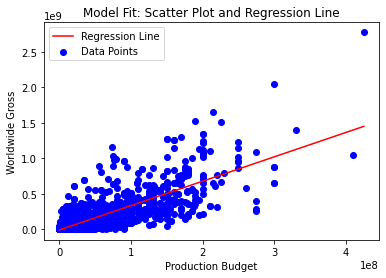

In [46]:
# Plot the model fit (scatter plot and regression line)
# Scatter plot
plt.scatter(X, Y, label='Data Points', color='b', marker='o')

# Linear regression
coefficients = np.polyfit(X, Y, 1)  # Fit a linear regression line (1st degree polynomial)
print(coefficients)
# Generate points for the regression line
regression_line_X = np.linspace(min(X), max(X), 100)
regression_line_Y = np.polyval(coefficients, regression_line_X)

# Plot the regression line
plt.plot(regression_line_X, regression_line_Y, color='r', label='Regression Line')


# Customize the plot
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Model Fit: Scatter Plot and Regression Line')
plt.legend()

# Show the plot
plt.show()
